# Photometric precision calculator

In [1]:
import mphot

## Load the camera QE and filter files

### Camera/filter 1 (Andor, I+z')

In [2]:
# example files used to generate spectral response (SR)
efficiencyFile1 = './datafiles/systems/andorSPC_-60.csv' # in microns, fractional efficiency
filterFile1 = './datafiles/filters/I+z.csv'

# name to refer to the generated file
name1 = efficiencyFile1.split('/')[-1][:-4] + '_' + filterFile1.split('/')[-1][:-4]

# generates a SR, saved locally as 'name1_instrumentSR.csv'
SRFile1 = './datafiles/SRs/' + name1 + '_instrumentSR.csv'
mphot.generateSR(efficiencyFile1, filterFile1, SRFile1)

./datafiles/SRs/andorSPC_-60_I+z_instrumentSR.csv has been saved!


C:\Users\peter\GitHub\mphot\mphot.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)


### Camera/filter 2 (SPIRIT, zYJ)

In [4]:
# example files used to generate SR
efficiencyFile2 = './datafiles/systems/pirtSPC_-60.csv'
filterFile2 = './datafiles/filters/zYJ.csv'

# name to refer to the generated file
name2 = efficiencyFile2.split('/')[-1][:-4] + '_' + filterFile2.split('/')[-1][:-4]

# generates a SR, saved locally as 'name1_instrumentSR.csv'
SRFile2 = './datafiles/SRs/' + name2 + '_instrumentSR.csv'
mphot.generateSR(efficiencyFile2, filterFile2, SRFile2)

./datafiles/SRs/pirtSPC_-60_zYJ_instrumentSR.csv has been saved!


### Plot spectral response curves

(<Figure size 3000x1500 with 1 Axes>,
 <AxesSubplot:xlabel='Wavelength [$\\mathregular{\\mu}$m]', ylabel='Fractional efficiency'>)

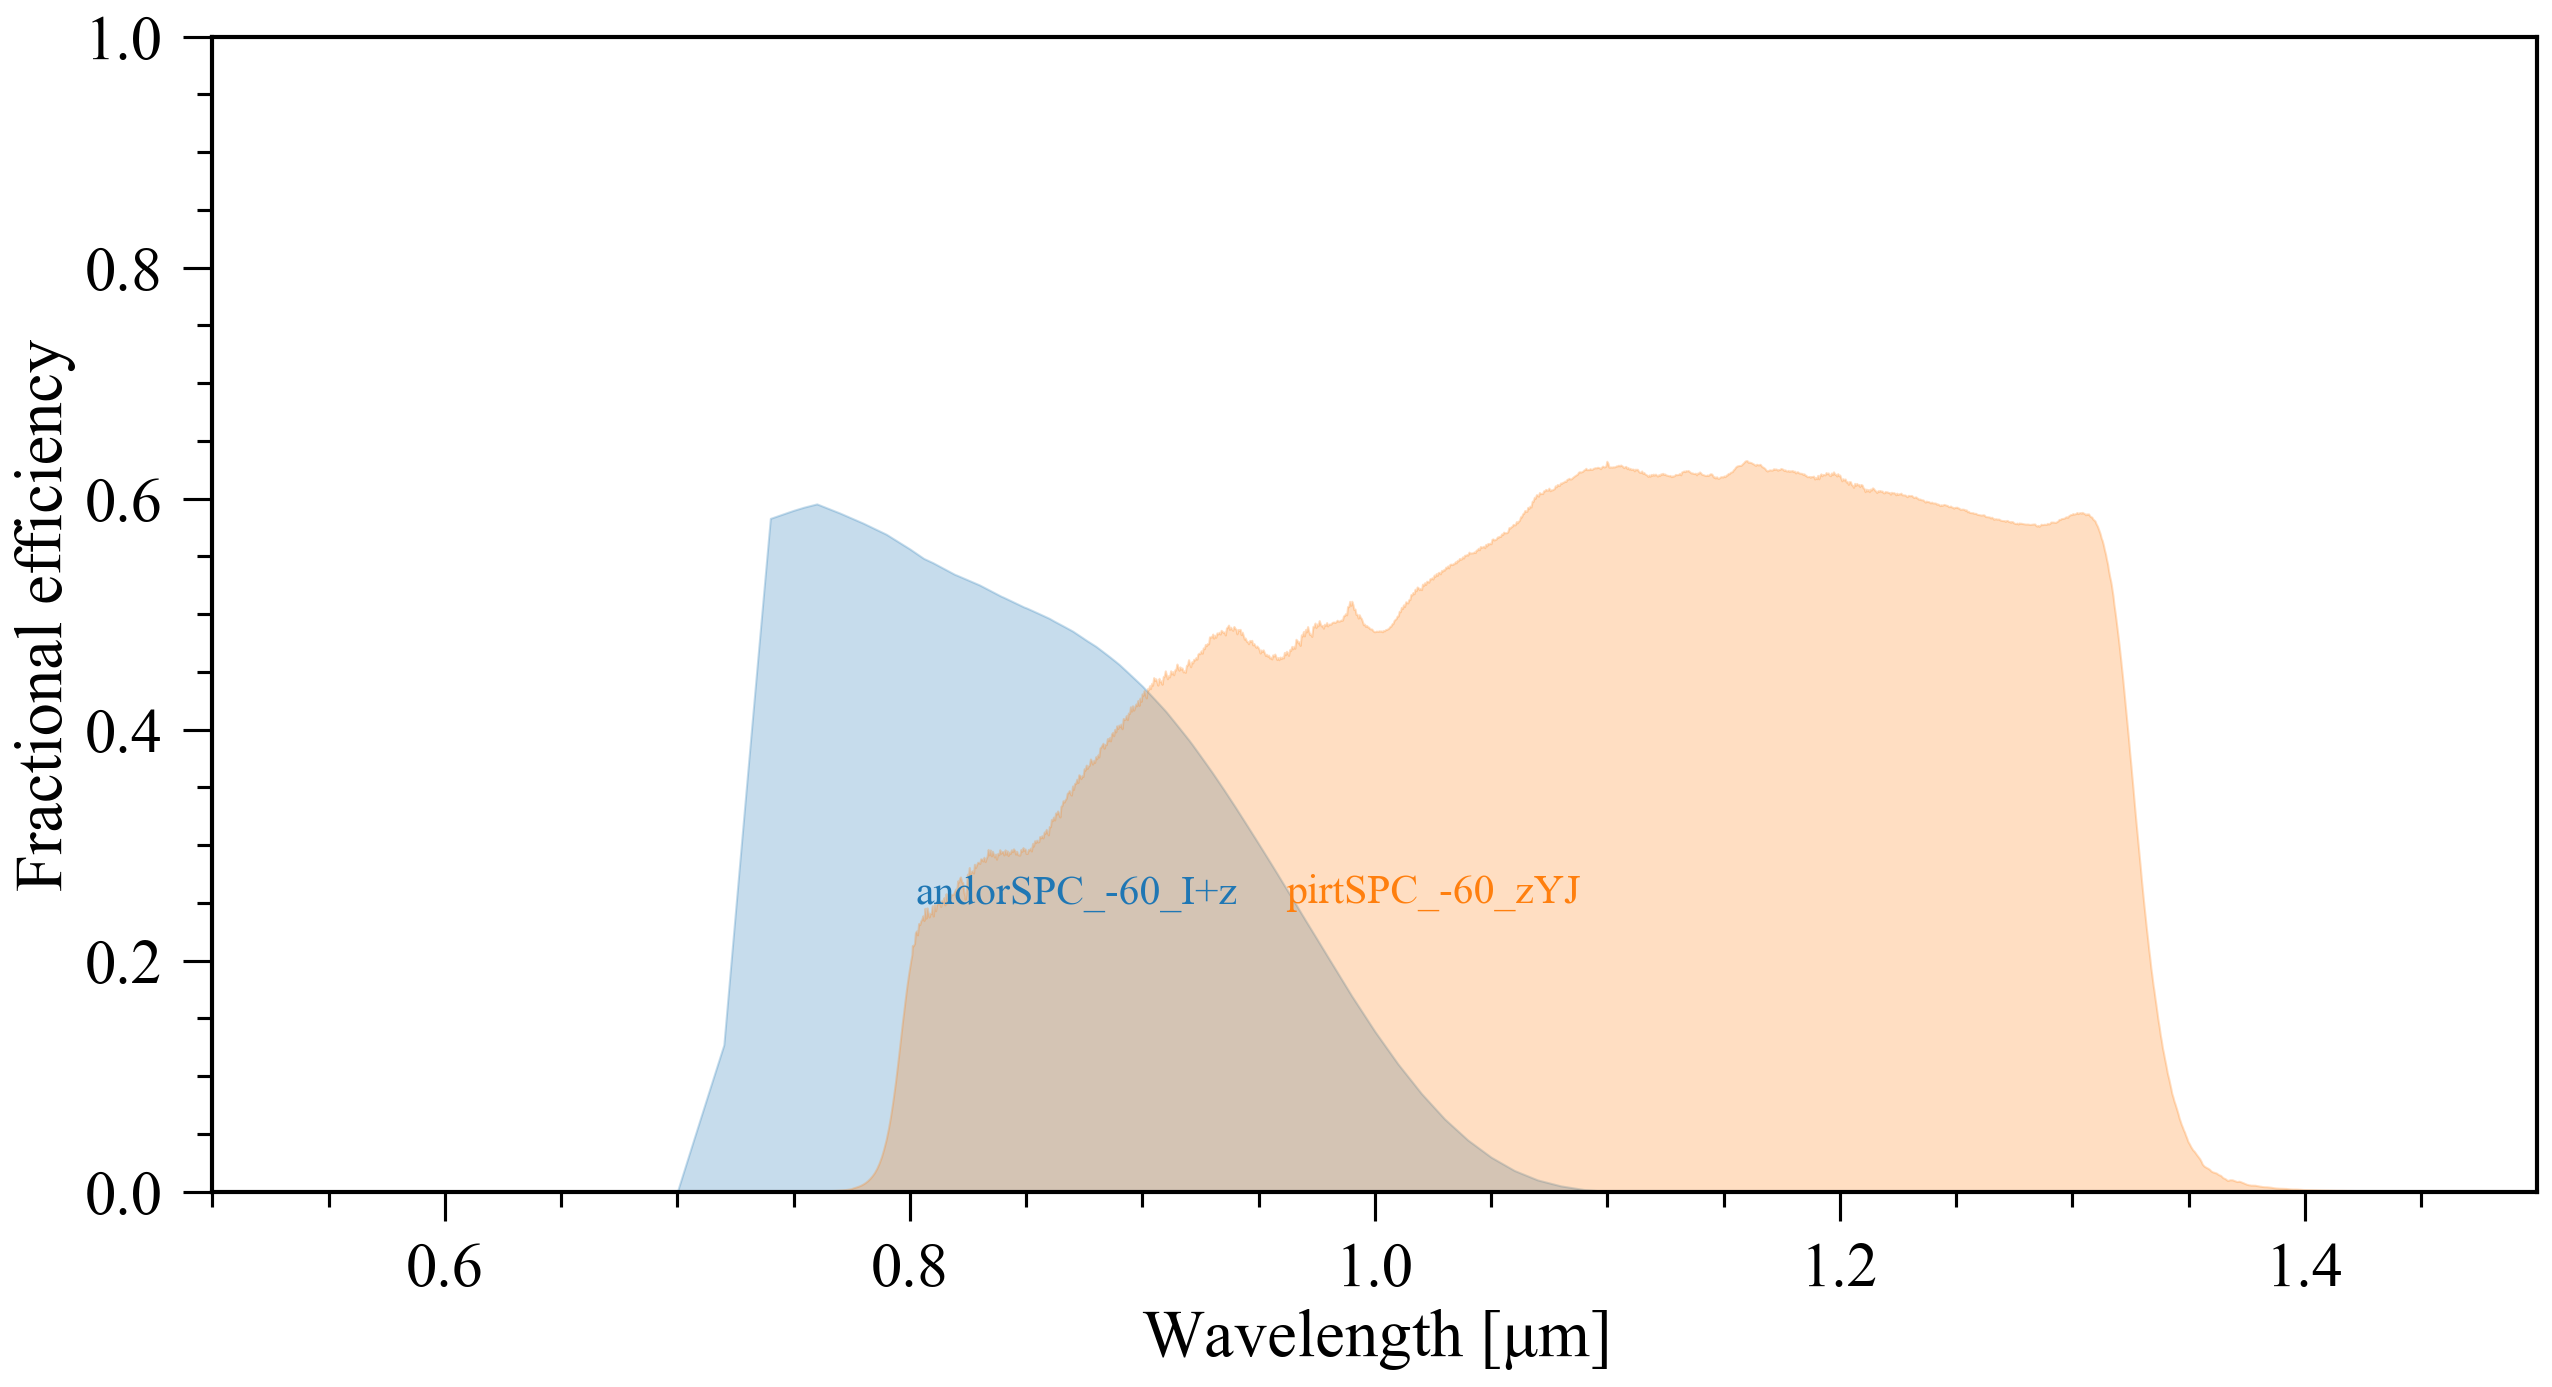

In [5]:
mphot.plotSRs(name1, name2)

## Set sky and instrument properties

In [14]:
props_sky = {
    "pwv" : 2.5, # PWV [mm]
    "airmass" : 1.1, # Airmass
    "seeing" : 1.2 # Seeing/FWHM ["]
}

In [15]:
props_telescope1 = {
    "name" : name1, # name to get SR/precision grid from file
    "plate_scale" : 0.35, # pixel plate scale ["]
    "N_dc" : 0.2, # dark current [e/pix/s]
    "N_rn" : 6.328, # read noise [e_rms/pix]
    "well_depth" : 64000, # well depth [e/pix]
    "bias_level" : 0, # bias level [e/pix] - not really needed if well depth ignores bias level
    "well_fill" : 0.7, # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time" : 10.5, # read time between images [s]
    "r0" : 0.5, # radius of telescope's primary mirror [m]
    "r1" : 0.14, # radius of telescope's secondary mirror [m]
    "ap_rad" : 3 # aperture radius [FWHM] -- 3 default == 7 sigma of Gaussian ~ aperture 6 on Cambridge pipeline/Portal
}

props_telescope2 = {
    "name" : name2,
    "plate_scale" : 0.35 * (12/13.5),
    "N_dc" : 230,
    "N_rn" : 80,
    "well_depth" : 55000,
    "bias_level" : 0,
    "well_fill" : 0.7,
    "read_time" : 0.1,
    "r0" : 0.5,
    "r1" : 0.14,
    "ap_rad" : 3
}

## Target temperature and distace

In [16]:
Teff = 5503 # [K]
distance = 268.325 # [pc]

## Run models!

In [17]:
r1 = mphot.get_precision(props_telescope1, props_sky, Teff, distance, override=False)
r2 = mphot.get_precision(props_telescope2, props_sky, Teff, distance, override=False)

In [18]:
mphot.display_results(props_sky, r1, r2)

C:\Users\peter\GitHub\mphot\mphot.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)
C:\Users\peter\GitHub\mphot\mphot.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)


single        binned       
                   1     2       1      2
All             2.98  4.59   0.515  0.402
Star            1.27  1.24   0.220  0.109
Scintillation   2.67  3.43   0.461  0.300
Sky            0.294 0.558  0.0509 0.0489
Dark current  0.0359  1.02 6.20e-3 0.0896
Read noise     0.186  2.54  0.0322  0.223

,1,2
name,andorSPC_-60_I+z,pirtSPC_-60_zYJ
Teff [K],5.50e+3,5.50e+3
distance [pc],268,268
N_star [e/s],8.34e+4,1.43e+5
star_flux [e/m2/s],1.15e+5,1.98e+5
scn [e_rms],1.65e+3,2.21e+3
npix,332,421
ap_radius [pix],10.3,11.6
N_sky [e/pix/s],13.5,68.5
sky_radiance [e/m2/arcsec2/s],152,978


,1,2
star [mag],11.6,11.4
sky [mag/arcsec2],18.8,17.1
vega_flux [e/s],3.64e+9,4.98e+9


### Extract exposure time nicely

In [22]:
spirit = mphot.get_precision(props_telescope2, props_sky, Teff, distance, override=False, mapping=True)
spirit

{'image_precision': {'All': 0.004592455300630428,
  'Star': 0.0012443057182314502,
  'Scintillation': 0.003425135325703111,
  'Sky': 0.000558012000429689,
  'Dark current': 0.0010225794697190183,
  'Read noise': 0.002540423351327748},
 'binned_precision': {'All': 0.000402485363640318,
  'Star': 0.00010905165248170473,
  'Scintillation': 0.00030018078497000793,
  'Sky': 4.89044853365854e-05,
  'Dark current': 8.961943944549313e-05,
  'Read noise': 0.0002226441303019635},
 'components': {'name': 'pirtSPC_-60_zYJ',
  'Teff [K]': 5503,
  'distance [pc]': 268.325,
  'N_star [e/s]': 143255.63760963638,
  'star_flux [e/m2/s]': 197915.30252912204,
  'scn [e_rms]': 2212.1956860867595,
  'npix': 420.6528449020946,
  'ap_radius [pix]': 11.571428571428573,
  'N_sky [e/pix/s]': 68.48899214415098,
  'sky_radiance [e/m2/arcsec2/s]': 977.5914264201269,
  'plate_scale ["/pix]': 0.31111111111111106,
  'N_dc [e/pix/s]': 230,
  'N_rn [e_rms/pix]': 80,
  'A [m2]': 0.7238229473870883,
  'r0 [m]': 0.5,
  'r1

In [23]:
spirit['components']['t [s]']

4.508520867655561